### Deliverable 1: Preprocessing the Data for a Neural Network

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("charity_data.csv")
application_df.head()

2023-02-16 10:31:37.466973: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [2]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df = application_df.drop(columns=["EIN","NAME"])
application_df

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1
...,...,...,...,...,...,...,...,...,...,...
34294,T4,Independent,C1000,ProductDev,Association,1,0,N,5000,0
34295,T4,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
34296,T3,CompanySponsored,C2000,Preservation,Association,1,0,N,5000,0
34297,T5,Independent,C3000,ProductDev,Association,1,0,N,5000,1


In [3]:
# Determine the number of unique values in each column.
application_df.nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [4]:
# Look at APPLICATION_TYPE value counts for binning
application_df['APPLICATION_TYPE'].value_counts()

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

<AxesSubplot: ylabel='Density'>

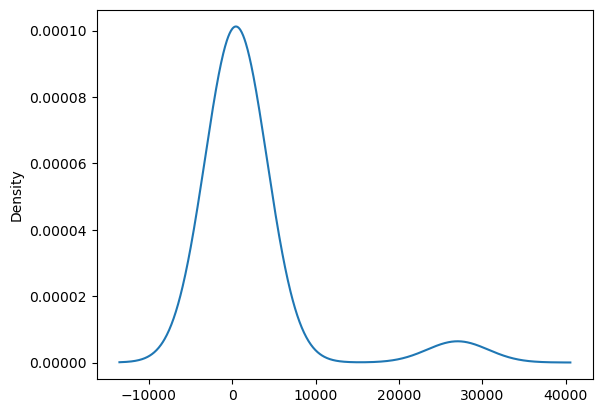

In [5]:
# Visualize the value counts of APPLICATION_TYPE
value_counts = application_df['APPLICATION_TYPE'].value_counts()
value_counts.plot.density()

In [6]:
# Determine which values to replace if counts are less than ...?
replace_application = list(value_counts[value_counts < 600].index)

# Replace in dataframe
for app in replace_application:
    application_df.APPLICATION_TYPE = application_df.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
application_df.APPLICATION_TYPE.value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
Other      804
T8         737
T7         725
Name: APPLICATION_TYPE, dtype: int64

<AxesSubplot: ylabel='Density'>

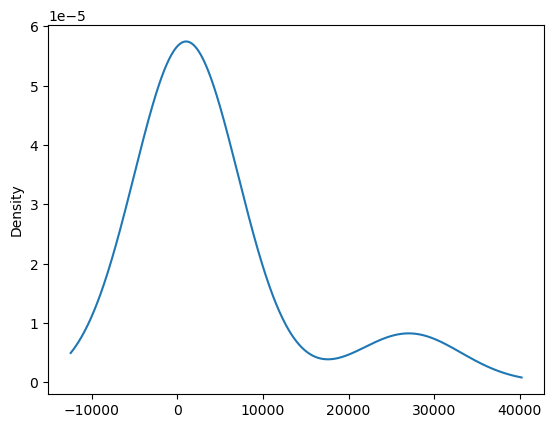

In [7]:
# Visualize the value counts of APPLICATION_TYPE
value_counts = application_df['APPLICATION_TYPE'].value_counts()
value_counts.plot.density()

In [8]:
# Look at CLASSIFICATION value counts for binning
application_df['CLASSIFICATION'].value_counts()

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64

<AxesSubplot: ylabel='Density'>

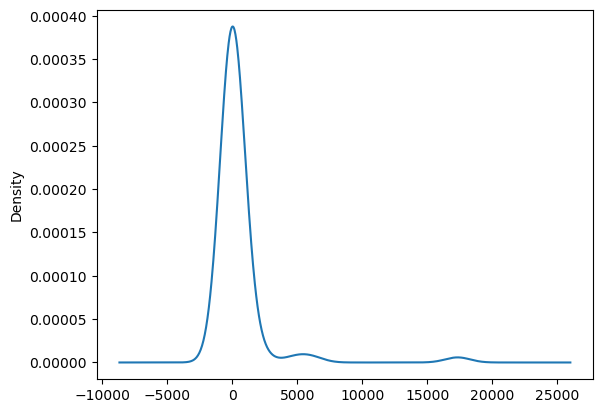

In [9]:
# Visualize the value counts of CLASSIFICATION
value_counts = application_df['CLASSIFICATION'].value_counts()
value_counts.plot.density()

In [10]:
# Determine which values to replace if counts are less than ..?
replace_class = list(value_counts[value_counts < 1000].index)

# Replace in dataframe
for cls in replace_class:
    application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(cls,"Other")
    
# Check to make sure binning was successful
application_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [11]:
value_counts = application_df['INCOME_AMT'].value_counts()
value_counts

0                24388
25000-99999       3747
100000-499999     3374
1M-5M              955
1-9999             728
10000-24999        543
10M-50M            240
5M-10M             185
50M+               139
Name: INCOME_AMT, dtype: int64

<AxesSubplot: ylabel='Density'>

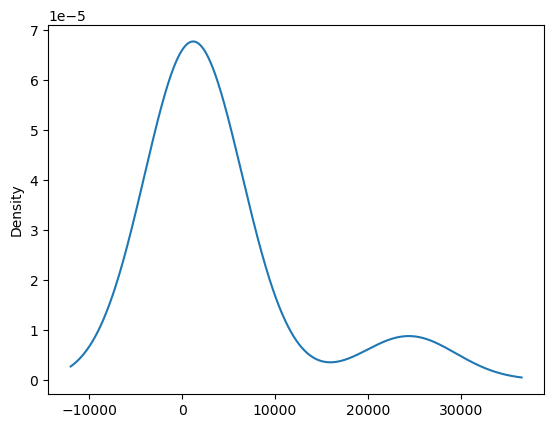

In [12]:
value_counts = application_df['INCOME_AMT'].value_counts()
value_counts.plot.density()

In [13]:
# Determine which values to replace if counts are less than ..?
replace_class = list(value_counts[value_counts < 500].index)

# Replace in dataframe
for cls in replace_class:
    application_df.INCOME_AMT = application_df.INCOME_AMT.replace(cls,"Other")
    
# Check to make sure binning was successful
application_df.INCOME_AMT.value_counts()

0                24388
25000-99999       3747
100000-499999     3374
1M-5M              955
1-9999             728
Other              564
10000-24999        543
Name: INCOME_AMT, dtype: int64

In [14]:
value_counts = application_df['AFFILIATION'].value_counts()
value_counts

Independent         18480
CompanySponsored    15705
Family/Parent          64
National               33
Regional               13
Other                   4
Name: AFFILIATION, dtype: int64

<AxesSubplot: ylabel='Density'>

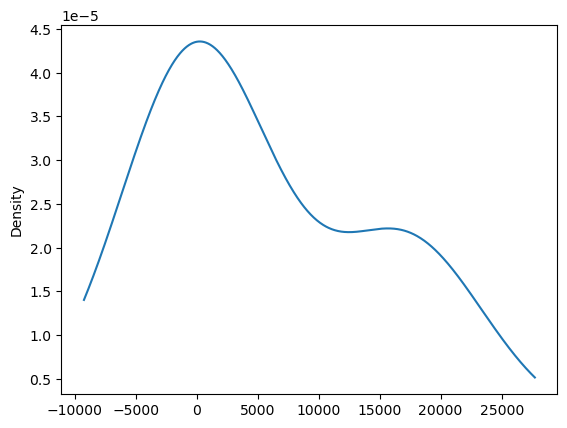

In [15]:
value_counts.plot.density()

In [16]:
# # Determine which values to replace if counts are less than ..?
# replace_class = list(value_counts[value_counts < 5000].index)

# # Replace in dataframe
# for cls in replace_class:
#     application_df.AFFILIATION = application_df.AFFILIATION.replace(cls,"Other")
    
# # Check to make sure binning was successful
# application_df.AFFILIATION.value_counts()

In [17]:
# value_counts = application_df['ORGANIZATION'].value_counts()
# value_counts

In [18]:
# value_counts.plot.density()

In [19]:
# # Determine which values to replace if counts are less than ..?
# replace_class = list(value_counts[value_counts < 500].index)

# # Replace in dataframe
# for cls in replace_class:
#     application_df.ORGANIZATION = application_df.ORGANIZATION.replace(cls,"Other")
    
# # Check to make sure binning was successful
# application_df.ORGANIZATION.value_counts()

In [20]:
application_df = application_df.drop(columns='SPECIAL_CONSIDERATIONS')

In [21]:
application_df = application_df.drop(columns='STATUS')

In [22]:
# Generate our categorical variable lists
application_cat = application_df.select_dtypes(include = 'object').columns
for col in application_cat:
    print(col)

APPLICATION_TYPE
AFFILIATION
CLASSIFICATION
USE_CASE
ORGANIZATION
INCOME_AMT


In [23]:
enc = OneHotEncoder(sparse=False)

for col in application_cat:
    encode_df = pd.DataFrame(enc.fit_transform(application_df[col].values.reshape(-1, 1)))
    encode_df.columns = enc.get_feature_names([col])
    
    application_df = application_df.merge(encode_df,left_index=True,right_index=True)
    application_df = application_df.drop(columns= col)
    



    
                                    
    
 

/Users/jordanravelo/opt/anaconda3/envs/mlenv/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/Users/jordanravelo/opt/anaconda3/envs/mlenv/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/Users/jordanravelo/opt/anaconda3/envs/mlenv/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/Users/jordanravelo/opt/anaconda3/envs/mlenv/l

In [24]:
application_df

,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,...,ORGANIZATION_Co-operative,ORGANIZATION_Corporation,ORGANIZATION_Trust,INCOME_AMT_0,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_Other
0,5000,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,108590,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,5000,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,6692,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,142590,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34294,5000,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
34295,5000,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
34296,5000,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
34297,5000,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
# Split our preprocessed data into our features and target arrays
X = application_df.drop(columns="IS_SUCCESSFUL")
y= application_df['IS_SUCCESSFUL']

# Split the preprocessed data into a training and testing dataset
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=1)

In [26]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

print(X_train_scaled.shape)
print(y_train.shape)

(25724, 37)
(25724,)


### Deliverable 2: Compile, Train and Evaluate the Model

In [27]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
input_nodes = len(X_train_scaled[0])
hidden_layer_1 = 45
hidden_layers = [34,13,6,2]

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_layer_1,input_dim =input_nodes,activation ="tanh"))

# Second hidden layer
for hl in hidden_layers:
       nn.add(tf.keras.layers.Dense(units = hl, activation ="tanh"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1,activation="sigmoid"))

# Check the structure of the model
nn.summary()

2023-02-16 10:31:43.320903: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 45)                1710      
                                                                 
 dense_1 (Dense)             (None, 34)                1564      
                                                                 
 dense_2 (Dense)             (None, 13)                455       
                                                                 
 dense_3 (Dense)             (None, 6)                 84        
                                                                 
 dense_4 (Dense)             (None, 2)                 14        
                                                                 
 dense_5 (Dense)             (None, 1)                 3         
                                                                 
Total params: 3,830
Trainable params: 3,830
Non-trainabl

In [28]:
import os
from tensorflow.keras.callbacks import ModelCheckpoint

os.makedirs("checkpoints/",exist_ok=True)

checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

In [29]:
# Compile the model
nn.compile(loss="binary_crossentropy",optimizer ="adam",metrics=["accuracy"])

In [38]:
cp_callback = ModelCheckpoint(
filepath=checkpoint_path,
verbose= 1,
save_weights_only= True,
save_freq='epoch',
period = 5)

In [39]:
# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=500, callbacks= [cp_callback])

Epoch 1/500
804/804 [==============================] - 1s 700us/step - loss: 0.5288 - accuracy: 0.7431
Epoch 2/500
804/804 [==============================] - 1s 733us/step - loss: 0.5289 - accuracy: 0.7431
Epoch 3/500
804/804 [==============================] - 1s 738us/step - loss: 0.5293 - accuracy: 0.7425
Epoch 4/500
804/804 [==============================] - 1s 684us/step - loss: 0.5288 - accuracy: 0.7427
Epoch 5/500
743/804 [==========================>...] - ETA: 0s - loss: 0.5288 - accuracy: 0.7419
Epoch 5: saving model to checkpoints/weights.05.hdf5
804/804 [==============================] - 1s 747us/step - loss: 0.5287 - accuracy: 0.7425
Epoch 6/500
804/804 [==============================] - 1s 686us/step - loss: 0.5286 - accuracy: 0.7427
Epoch 7/500
804/804 [==============================] - 1s 681us/step - loss: 0.5286 - accuracy: 0.7439
Epoch 8/500
804/804 [==============================] - 1s 699us/step - loss: 0.5288 - accuracy: 0.7430
Epoch 9/500
804/804 [=================

KeyboardInterrupt: 

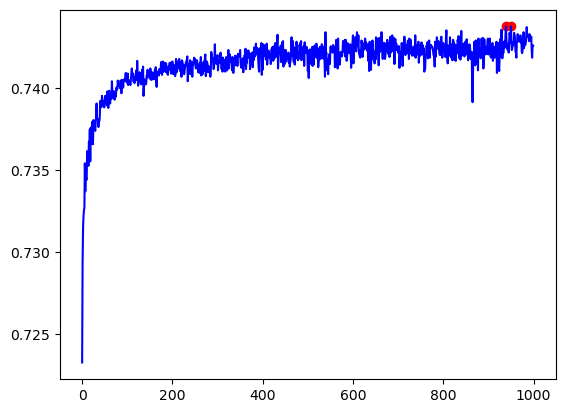

In [33]:
import matplotlib.pyplot as plt
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history['accuracy'])+1))

x = range(0,len(history_df['accuracy']))
y_2 = history_df['accuracy']
          
max_point = history_df.loc[history_df['accuracy'] == max(history_df['accuracy'])]
plt.plot(x,y_2,color = 'blue')      
plt.scatter(max_point.index,max_point['accuracy'],color = 'red')

In [34]:
max_point

,loss,accuracy
940,0.529077,0.74378
951,0.529051,0.74378


In [35]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5740 - accuracy: 0.7276 - 366ms/epoch - 1ms/step
Loss: 0.5740418434143066, Accuracy: 0.727580189704895
